In [ ]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [14]:
df=pd.read_csv("weather_data.csv")
df

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,No,No
1,Sunny,Hot,High,Yes,No
2,Overcast,Hot,High,No,Yes
3,Rainy,Mild,High,No,Yes
4,Rainy,Cool,Normal,No,Yes
5,Rainy,Cool,Normal,Yes,No
6,Overcast,Cool,Normal,Yes,Yes
7,Sunny,Mild,High,No,No
8,Sunny,Cool,Normal,No,Yes
9,Rainy,Mild,Normal,No,Yes


In [15]:
label=LabelEncoder()
df["Outlook"]=label.fit_transform(df["Outlook"])
df["Temperature"]=label.fit_transform(df["Temperature"])
df["Humidity"]=label.fit_transform(df["Humidity"])
df["Windy"]=label.fit_transform(df["Windy"])
df["Play"]=label.fit_transform(df["Play"])

df


,Outlook,Temperature,Humidity,Windy,Play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [16]:
x=df.drop("Play",axis=1)
y=df["Play"]
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Play, dtype: int64

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)
x_train

,Outlook,Temperature,Humidity,Windy
13,1,2,0,1
2,0,1,0,0
6,0,0,1,1
8,2,0,1,0
11,0,2,0,1
3,1,2,0,0
12,0,1,1,0
5,1,0,1,1
1,2,1,0,1
0,2,1,0,0


In [18]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [19]:
y_pred=model.predict(x_test)
y_pred

array([1, 0, 0])

In [20]:
accuracy=accuracy_score(y_pred,y_test)
print(f"accuracy:{accuracy*100:.2f}%")

accuracy:66.67%


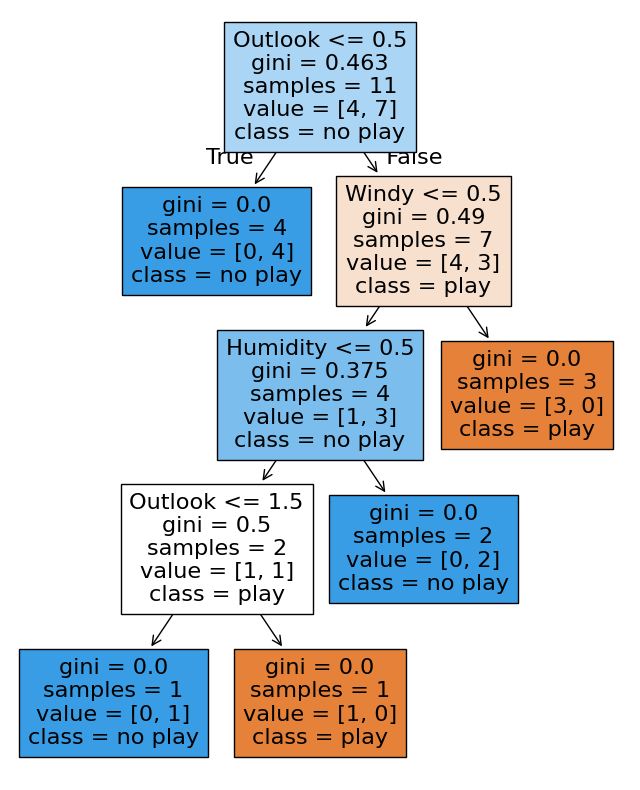

In [21]:
plt.figure(figsize=(8,10))
plot_tree(model,feature_names=["Outlook","Temperature","Humidity","Windy"],class_names=["play","no play"],filled=True)
plt.show()

In [24]:
data=pd.DataFrame({
    "Outlook":["Rainy"],
    "Temperature":["Cool"],
    "Humidity":["High"],
    "Windy":["No"],
    

})
data["Outlook"]=label.fit_transform(data["Outlook"])
data["Temperature"]=label.fit_transform(data["Temperature"])
data["Humidity"]=label.fit_transform(data["Humidity"])
data["Windy"]=label.fit_transform(data["Windy"])


predict=model.predict(data)
predict


array([1])